In [2]:
import requests
import pandas as pd
import json


***This file was downloaded directly to the laptop.  Since it's available for download, there is no API call made.  You'll have to download this yourself. http://inalitic.com/datasets/nhl%20player%20data.html*** 

In [4]:
df = pd.read_csv('skater_stats.csv', encoding='latin1')

//anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (22,23) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [5]:
df.head()

,Unnamed: 0,Season,Player,Age,Tm,Pos,GP,G,GPG,A,...,SHA,S,S%,TOI,ATOI,BLK,HIT,FOwin,FOloss,FO%
0,2018Justin Abdelkader,2018,Justin Abdelkader,30.0,DET,LW,75,13,0.1733,22,...,-,110,12,"1,241",16:33,40.0,174.0,47.0,50.0,48.5
1,2018Pontus Aberg,2018,Pontus Aberg,24.0,TOT,LW,53,4,0.0755,12,...,-,70,6,645,12:10,8.0,24.0,4.0,8.0,33.3
2,2018Noel Acciari,2018,Noel Acciari,26.0,BOS,C,60,10,0.1667,1,...,-,66,15,775,12:55,41.0,152.0,42.0,51.0,45.2
3,2018Kenny Agostino,2018,Kenny Agostino,25.0,BOS,LW,5,-,0.0000,1,...,-,11,-,60,12:03,1.0,4.0,0.0,1.0,0.0
4,2018Sebastian Aho,2018,Sebastian Aho,20.0,CAR,RW,78,29,0.3718,36,...,-,200,15,"1,398",17:55,17.0,65.0,78.0,94.0,45.3


In [6]:
df.shape

(37825, 29)

In [7]:
df_fixed = df.drop('Unnamed: 0', axis = 1)

In [8]:
df_nhl = df_fixed

In [57]:
df_nhl[['Season', 'Player', 'Tm', 'S', 'S%']]

,Season,Player,Tm,S,S%
0,2018,Justin Abdelkader,DET,110,12
1,2018,Pontus Aberg,TOT,70,6
2,2018,Noel Acciari,BOS,66,15
3,2018,Kenny Agostino,BOS,11,-
4,2018,Sebastian Aho,CAR,200,15
...,...,...,...,...,...
37820,1940,Gordie Drillon*,TOR,NaN,NaN
37821,1940,Bill Cowley*,BOS,NaN,NaN
37822,1940,Woody Dumart*,BOS,NaN,NaN
37823,1940,Bobby Bauer*,BOS,NaN,NaN


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37825 entries, 0 to 37824
Data columns (total 29 columns):
Unnamed: 0    37825 non-null object
Season        37825 non-null int64
Player        37825 non-null object
Age           37823 non-null float64
Tm            37825 non-null object
Pos           37825 non-null object
GP            37825 non-null int64
G             37825 non-null object
GPG           37825 non-null float64
A             37825 non-null object
PTS           37825 non-null object
+/-           33913 non-null object
PIM           37824 non-null object
EVG           34537 non-null object
PPG           34537 non-null object
SHG           34537 non-null object
GWG           34537 non-null object
EVA           33913 non-null object
PPA           33913 non-null object
SHA           33913 non-null object
S             33911 non-null object
S%            32723 non-null object
TOI           16625 non-null object
ATOI          16625 non-null object
BLK           9674 non-null

In [11]:
df_nhl.Tm.unique()

array([' DET ', ' TOT ', ' BOS ', ' CAR ', ' NYI ', ' MTL ', ' LAK ',
       ' CBJ ', ' NYR ', ' CGY ', ' COL ', ' CHI ', ' BUF ', ' VAN ',
       ' WPG ', ' NSH ', ' PIT ', ' EDM ', ' WSH ', ' FLA ', ' STL ',
       ' ANA ', ' VEG ', ' MIN ', ' DAL ', ' OTT ', ' SJS ', ' TOR ',
       ' TBL ', ' NJD ', ' ARI ', ' PHI ', ' PHX ', ' ATL ', ' MDA ',
       ' HAR ', ' WIN ', ' QUE ', ' MNS ', ' CBH ', ' CLR ', ' ATF ',
       ' CLE ', ' CGS ', ' KCS ', ' OAK ', ' BRO ', ' NYA '], dtype=object)

In [38]:
df_nhl_before_pad_change = df_nhl.loc[(df_nhl.Season == 2001) | (df_nhl.Season == 2002)]
df_nhl_before_pad_change = df_nhl.loc[(df_nhl.Season == 2003) | (df_nhl.Season == 2005)]

In [45]:
df_nhl.loc[df_nhl.Player == 'Nikita Kucherov']

,Season,Player,Age,Tm,Pos,GP,G,GPG,A,PTS,...,SHA,S,S%,TOI,ATOI,BLK,HIT,FOwin,FOloss,FO%
451,2018,Nikita Kucherov,24.0,TBL,RW,80,39,0.4875,61,100,...,-,279,14,"1,586",19:49,15.0,31.0,3.0,2.0,60.0
1316,2017,Nikita Kucherov,23.0,TBL,RW,74,40,0.5405,45,85,...,-,246,16,"1,438",19:26,20.0,30.0,0.0,0.0,NaN
1799,2016,Nikita Kucherov,22.0,TBL,RW,77,30,0.3896,36,66,...,-,209,14,"1,402",18:13,28.0,61.0,0.0,1.0,0.0
2702,2015,Nikita Kucherov,21.0,TBL,RW,82,29,0.3537,36,65,...,-,191,15,"1,226",14:57,28.0,65.0,0.0,2.0,0.0
3935,2014,Nikita Kucherov,20.0,TBL,RW,52,9,0.1731,9,18,...,-,102,9,682,13:07,19.0,15.0,1.0,0.0,100.0


Assumptions here:  The 2004-2005 season was a lockout year and it never actually happened.  Our comparisons are:
    
    For pads - 2002-03 vs 2003-04 (2003 vs 2004 in DataFrame)
    For 2-line - 2003-04 vs 2004-06 (2004 vs 2006 in DataFrame)

In [132]:
df_nhl_2003 = df_nhl.loc[df_nhl.Season == 2003]
df_nhl_2004 = df_nhl.loc[df_nhl.Season == 2004]
df_nhl_2006 = df_nhl.loc[df_nhl.Season == 2006]

In [112]:
df_nhl_2006_working = df_nhl_2006

In [113]:
df_nhl_2006_working.G.unique()

array([' 29 ', ' 54 ', ' 52 ', ' 43 ', ' 50 ', ' 39 ', ' 45 ', ' 28 ',
       ' 56 ', ' 23 ', ' 40 ', ' 19 ', ' 48 ', ' 38 ', ' 32 ', ' 34 ',
       ' 31 ', ' 33 ', ' 16 ', ' 25 ', ' 47 ', ' 27 ', ' 21 ', ' 22 ',
       ' 35 ', ' 18 ', ' 13 ', ' 26 ', ' 30 ', ' 9 ', ' 17 ', ' 36 ',
       ' 24 ', ' 20 ', ' 12 ', ' 15 ', ' 14 ', ' 10 ', ' 11 ', ' 6 ',
       ' 5 ', ' 2 ', ' 8 ', ' 7 ', ' 4 ', ' 3 ', ' 1 ', ' -   '],
      dtype=object)

In [103]:
df_nhl_2006_working = df_nhl_2006_working.loc[df_nhl_2006_working.G == ' -   '].replace(' -   ', ' 0 ')

In [114]:
df_nhl_2006_working.G.replace(' -   ',' 0  ',inplace=True)

In [115]:
df_nhl_2006_working.G.unique()

array([' 29 ', ' 54 ', ' 52 ', ' 43 ', ' 50 ', ' 39 ', ' 45 ', ' 28 ',
       ' 56 ', ' 23 ', ' 40 ', ' 19 ', ' 48 ', ' 38 ', ' 32 ', ' 34 ',
       ' 31 ', ' 33 ', ' 16 ', ' 25 ', ' 47 ', ' 27 ', ' 21 ', ' 22 ',
       ' 35 ', ' 18 ', ' 13 ', ' 26 ', ' 30 ', ' 9 ', ' 17 ', ' 36 ',
       ' 24 ', ' 20 ', ' 12 ', ' 15 ', ' 14 ', ' 10 ', ' 11 ', ' 6 ',
       ' 5 ', ' 2 ', ' 8 ', ' 7 ', ' 4 ', ' 3 ', ' 1 ', ' 0  '],
      dtype=object)

In [116]:
df_nhl_2006_working.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 870 entries, 10542 to 11411
Data columns (total 28 columns):
Season    870 non-null int64
Player    870 non-null object
Age       870 non-null float64
Tm        870 non-null object
Pos       870 non-null object
GP        870 non-null int64
G         870 non-null object
GPG       870 non-null float64
A         870 non-null object
PTS       870 non-null object
+/-       870 non-null object
PIM       870 non-null object
EVG       870 non-null object
PPG       870 non-null object
SHG       870 non-null object
GWG       870 non-null object
EVA       870 non-null object
PPA       870 non-null object
SHA       870 non-null object
S         870 non-null object
S%        837 non-null object
TOI       870 non-null object
ATOI      870 non-null object
BLK       0 non-null float64
HIT       0 non-null float64
FOwin     0 non-null float64
FOloss    0 non-null float64
FO%       0 non-null float64
dtypes: float64(7), int64(2), object(19)
memory usage:

In [90]:
df_nhl_2006_working.G.map()

TypeError: map() missing 1 required positional argument: 'arg'

In [119]:
df_nhl_2006_working.G = df_nhl_2006_working.G.astype(int)

//anaconda3/lib/python3.7/site-packages/pandas/core/generic.py:5208: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [120]:
df_nhl_2006_working.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 870 entries, 10542 to 11411
Data columns (total 28 columns):
Season    870 non-null int64
Player    870 non-null object
Age       870 non-null float64
Tm        870 non-null object
Pos       870 non-null object
GP        870 non-null int64
G         870 non-null int64
GPG       870 non-null float64
A         870 non-null object
PTS       870 non-null object
+/-       870 non-null object
PIM       870 non-null object
EVG       870 non-null object
PPG       870 non-null object
SHG       870 non-null object
GWG       870 non-null object
EVA       870 non-null object
PPA       870 non-null object
SHA       870 non-null object
S         870 non-null object
S%        837 non-null object
TOI       870 non-null object
ATOI      870 non-null object
BLK       0 non-null float64
HIT       0 non-null float64
FOwin     0 non-null float64
FOloss    0 non-null float64
FO%       0 non-null float64
dtypes: float64(7), int64(3), object(18)
memory usage: 

In [122]:
goals_06 = df_nhl_2006_working.G.sum()

In [137]:
df_nhl_2004_working = df_nhl_2004
df_nhl_2004_working.G.replace(' -   ',' 0  ',inplace=True)
goals_04 = df_nhl_2004_working.loc[:,'G'].astype(int)

In [138]:
df_nhl_2003_working = df_nhl_2003
df_nhl_2003_working.G.replace(' -   ',' 0  ',inplace=True)
goals_03 = df_nhl_2003_working.loc[:,'G'].astype(int)

In [139]:
df_nhl_2002 = df_nhl.loc[df_nhl.Season == 2002]
df_nhl_2002_working = df_nhl_2002
df_nhl_2002_working.G.replace(' -   ',' 0  ',inplace=True)
goals_02 = df_nhl_2002_working.loc[:,'G'].astype(int)

In [140]:
df_nhl_2001 = df_nhl.loc[df_nhl.Season == 2001]
df_nhl_2001_working = df_nhl_2001
df_nhl_2001_working.G.replace(' -   ',' 0  ',inplace=True)
goals_01 = df_nhl_2001_working.loc[:,'G'].astype(int)

In [141]:
df_nhl_2000 = df_nhl.loc[df_nhl.Season == 2000]
df_nhl_2000_working = df_nhl_2000
df_nhl_2000_working.G.replace(' -   ',' 0  ',inplace=True)
goals_00 = df_nhl_2000_working.loc[:,'G'].astype(int)

In [142]:
goals_06

7442

In [151]:
goals_04

6317

In [154]:
goals_03 = goals_03.sum()

In [155]:
goals_02 = goals_02.sum()

In [156]:
goals_01 = goals_01.sum()

In [157]:
goals_00 = goals_00.sum()

In [168]:
df_nhl_1999 = df_nhl.loc[df_nhl.Season == 1999]
df_nhl_1999_working = df_nhl_1999
df_nhl_1999_working.G.replace(' -   ',' 0  ',inplace=True)
goals_99 = df_nhl_1999_working.loc[:,'G'].astype(int)
print(goals_99)
goals_99 = goals_99.sum()

15812     0
15813     0
15814     0
15815     0
15816     0
         ..
16621    41
16622    30
16623    39
16624    47
16625    44
Name: G, Length: 814, dtype: int64


In [169]:
df_nhl_1998 = df_nhl.loc[df_nhl.Season == 1998]
df_nhl_1998_working = df_nhl_1998
df_nhl_1998_working.G.replace(' -   ',' 0  ',inplace=True)
goals_98 = df_nhl_1999_working.loc[:,'G'].astype(int)
print(goals_98)
goals_98 = goals_98.sum()

15812     0
15813     0
15814     0
15815     0
15816     0
         ..
16621    41
16622    30
16623    39
16624    47
16625    44
Name: G, Length: 814, dtype: int64


In [164]:
df_nhl_1997 = df_nhl.loc[df_nhl.Season == 1997]
df_nhl_1997_working = df_nhl_1997
df_nhl_1997_working.G.replace(' -   ',' 0  ',inplace=True)
goals_97 = df_nhl_1997_working.loc[:,'G'].astype(int)
goals_97 = goals_97.sum()

In [181]:
goals_97, goals_98, goals_99, goals_00, goals_01, goals_02, goals_03, goals_04, goals_06, goals_07

(6216, 5624, 5829, 6305, 6781, 6441, 6530, 6317, 7442, 7082)

In [171]:
df_nhl_1999_working.head()

,Season,Player,Age,Tm,Pos,GP,G,GPG,A,PTS,...,SHA,S,S%,TOI,ATOI,BLK,HIT,FOwin,FOloss,FO%
15812,1999,Rob Zettler,30.0,NSH,D,2,0,0.0,-,-,...,-,-,NaN,33,16:16,NaN,NaN,NaN,NaN,NaN
15813,1999,Jason Zent,27.0,PHI,LW,2,0,0.0,-,-,...,-,1,-,6,2:58,NaN,NaN,NaN,NaN,NaN
15814,1999,Trent Yawney,33.0,CHI,D,20,0,0.0,-,-,...,-,11,-,269,13:28,NaN,NaN,NaN,NaN,NaN
15815,1999,Tyler Wright,25.0,PIT,C,61,0,0.0,-,-,...,-,16,-,230,3:46,NaN,NaN,NaN,NaN,NaN
15816,1999,Jamie Wright,22.0,DAL,LW,11,0,0.0,-,-,...,-,10,-,84,7:37,NaN,NaN,NaN,NaN,NaN


In [180]:
df_nhl_2007 = df_nhl.loc[df_nhl.Season == 2007]
df_nhl_2007_working = df_nhl_2007
df_nhl_2007_working.G.replace(' -   ',' 0  ',inplace=True)
goals_07 = df_nhl_2007_working.G.astype(int).sum()

In [182]:
goals_01, goals_02, goals_03, goals_04, goals_06, goals_07

(6781, 6441, 6530, 6317, 7442, 7082)

In [195]:
df_nhl_2008 = df_nhl.loc[df_nhl.Season == 2008]
df_nhl_2008_working = df_nhl_2008
df_nhl_2008_working.G.replace(' -   ',' 0  ',inplace=True)
goals_08 = df_nhl_2008_working.G.astype(int).sum()
goals_08

6691

In [196]:
df_nhl_2009 = df_nhl.loc[df_nhl.Season == 2009]
df_nhl_2009_working = df_nhl_2009
df_nhl_2009_working.G.replace(' -   ',' 0  ',inplace=True)
goals_09 = df_nhl_2009_working.G.astype(int).sum()
goals_09

7006

In [197]:
df_nhl_2010 = df_nhl.loc[df_nhl.Season == 2010]
df_nhl_2010_working = df_nhl_2010
df_nhl_2010_working.G.replace(' -   ',' 0  ',inplace=True)
goals_10 = df_nhl_2010_working.G.astype(int).sum()
goals_10

6803

In [198]:
df_nhl_2011 = df_nhl.loc[df_nhl.Season == 2011]
df_nhl_2011_working = df_nhl_2011
df_nhl_2011_working.G.replace(' -   ',' 0  ',inplace=True)
goals_11 = df_nhl_2011_working.G.astype(int).sum()
goals_11

6721

In [200]:
goals_97, goals_98, goals_99, goals_00, goals_01, goals_02, goals_03, goals_04, goals_06, goals_07, goals_08, goals_09, goals_10, goals_11

(6216,
 5624,
 5829,
 6305,
 6781,
 6441,
 6530,
 6317,
 7442,
 7082,
 6691,
 7006,
 6803,
 6721)

In [201]:
df_nhl_1996 = df_nhl.loc[df_nhl.Season == 1996]
df_nhl_1996_working = df_nhl_1996
df_nhl_1996_working.G.replace(' -   ',' 0  ',inplace=True)
goals_96 = df_nhl_1996_working.G.astype(int).sum()
goals_96

6700

In [202]:
df_nhl_1995 = df_nhl.loc[df_nhl.Season == 1995]
df_nhl_1995_working = df_nhl_1995
df_nhl_1995_working.G.replace(' -   ',' 0  ',inplace=True)
goals_95 = df_nhl_1995_working.G.astype(int).sum()
goals_95

3727

In [203]:
df_nhl_1994 = df_nhl.loc[df_nhl.Season == 1994]
df_nhl_1994_working = df_nhl_1994
df_nhl_1994_working.G.replace(' -   ',' 0  ',inplace=True)
goals_94 = df_nhl_1994_working.G.astype(int).sum()
goals_94

7081

In [204]:
df_nhl_1993 = df_nhl.loc[df_nhl.Season == 1993]
df_nhl_1993_working = df_nhl_1993
df_nhl_1993_working.G.replace(' -   ',' 0  ',inplace=True)
goals_93 = df_nhl_1993_working.G.astype(int).sum()
goals_93

7311

In [206]:
import numpy as np
goals = [goals_93, goals_94, goals_95, goals_96, goals_97, goals_98, goals_99, goals_00, goals_01, goals_02, goals_03, goals_04, goals_06, goals_07, goals_08, goals_09, goals_10, goals_11]

In [208]:
season = [82] * (len(goals))
season

[82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82]

In [213]:
season[2] = 48
season[0] = 84
season[1] = 84
season

[84, 84, 48, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82]

In [217]:
teams = [24, 26, 26, 26, 26, 26, 27, 28, 30, 30, 30, 30, 30, 30, 30, 30, 30, 30]

In [218]:
avg_gpg = np.array(goals)/(np.array(season)*np.array(teams)*.5)

In [219]:
avg_gpg

array([7.25297619, 6.48443223, 5.97275641, 6.28517824, 5.83114447,
       5.27579737, 5.26558266, 5.49216028, 5.51300813, 5.23658537,
       5.30894309, 5.13577236, 6.0504065 , 5.75772358, 5.4398374 ,
       5.69593496, 5.53089431, 5.46422764])

In [216]:
avg_gpg[0]/12


7.252976190476191

In [223]:
nhl_dict = {}


In [226]:
nhl_dict[1993] = avg_gpg[0]
nhl_dict[1994] = avg_gpg[1]
nhl_dict[1995] = avg_gpg[2]
nhl_dict[1996] = avg_gpg[3]
nhl_dict[1997] = avg_gpg[4]
nhl_dict[1998] = avg_gpg[5]
nhl_dict[1999] = avg_gpg[6]
nhl_dict[2000] = avg_gpg[7]
nhl_dict[2001] = avg_gpg[8]
nhl_dict[2002] = avg_gpg[9]
nhl_dict[2003] = avg_gpg[10]
nhl_dict[2004] = avg_gpg[11]
nhl_dict[2006] = avg_gpg[12]
nhl_dict[2007] = avg_gpg[13]
nhl_dict[2008] = avg_gpg[14]
nhl_dict[2009] = avg_gpg[15]
nhl_dict[2010] = avg_gpg[16]
nhl_dict[2011] = avg_gpg[17]


In [227]:
nhl_dict

{1993: 7.252976190476191,
 1994: 6.4844322344322345,
 1995: 5.972756410256411,
 1996: 6.285178236397749,
 1997: 5.831144465290807,
 1998: 5.2757973733583485,
 1999: 5.265582655826559,
 2000: 5.4921602787456445,
 2001: 5.5130081300813005,
 2002: 5.236585365853658,
 2003: 5.308943089430894,
 2004: 5.135772357723577,
 2006: 6.050406504065041,
 2007: 5.757723577235772,
 2008: 5.439837398373983,
 2009: 5.695934959349594,
 2010: 5.53089430894309,
 2011: 5.464227642276422}

In [317]:
years = list(range(1995,2005))
season_pop_before_2lp_rule = []
for year in years:
    season_pop_before_2lp_rule.append(nhl_dict[year])
    
season_pop_before_2lp_rule

[5.972756410256411,
 6.285178236397749,
 5.831144465290807,
 5.2757973733583485,
 5.265582655826559,
 5.4921602787456445,
 5.5130081300813005,
 5.236585365853658,
 5.308943089430894,
 5.135772357723577]

In [279]:
season_pop_before_2lp_rule_test = season_pop_before_2lp_rule[0:]
season_pop_before_2lp_rule_test

[5.972756410256411,
 6.285178236397749,
 5.831144465290807,
 5.2757973733583485,
 5.265582655826559,
 5.4921602787456445,
 5.5130081300813005,
 5.236585365853658,
 5.308943089430894,
 5.135772357723577]

In [284]:
# bootstrapping and finding means

import numpy as np

sel_season = []
bootstrap_means = []

for iteration in range(1000):
    for samples in range(10):
        sel_season.append(np.random.choice(season_pop_before_2lp_rule_test))
    bootstrap_means.append(np.average(sel_season))
    sel_season = []

    

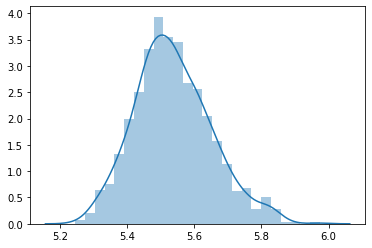

In [285]:
import seaborn as sns
%matplotlib inline
sns.distplot(bootstrap_means)

In [286]:
print(np.average(bootstrap_means), np.median(bootstrap_means))
print(np.average(bootstrap_means)/np.median(bootstrap_means))

5.536224512492927 5.526736613657345
1.0017167271572407


In [306]:
import scipy.stats as stats



In [304]:
import statsmodels.stats as sm


In [315]:
sm.weightstats.ttest_ind([nhl_dict[2006]], bootstrap_means)

(4.501643680054216, 7.5365637568480886e-06, 999.0)

In [316]:
sm.weightstats.ztest([nhl_dict[2006]], bootstrap_means)

(4.501643680054216, 6.742995805454414e-06)

## Quick and dirty summary

So this is what the above represents:

Our t-score: 4.50164....

Our z-score: same

Our p-value (t-test): 0.00000753636....

Our p-value (z-test): 0.0000067429958....

Our df (degrees of freedom for t-test): 999

What we are doing here is taking the average goals per game for each of the ten seasons before the rule change (that's from 1994-95 to 2003-04). 

From there, we bootstrap (choosing 10 samples *with replacement* from the 10 seasons of average goals per game data) 1000 times, and calculate the means for each bootstrapped sample.

Above, we plotted the histogram of these bootstrapped means and showed that it's relatively normal.  The mean and median are CLOSE, so it isn't unfair to assume normality - even though we can see from the graph that it is slightly skewed.

Then, we run a two sample t-test using statsmodel comparing the 2006 season average goals per game versus the distribution of the bootstrapped means.  This gives us a t-score of over 4.5 and a p-value way below our alpha of 0.05.

This is statistically significant, so it means we can reject our null hypothesis of "the rule change between before the 2005-2006 season did **not** have a net-positive effect on goals scored the following season" with 95% confidence.



### Playing with the undocumented NHL API

In [21]:
resp = requests.get('https://statsapi.web.nhl.com/api/v1/teams')

In [22]:
resp_work = resp

In [33]:
resp_work_t = resp_work.json()

In [36]:
type(resp_work_t)

dict

In [41]:
df_teams = pd.DataFrame(resp_work_t['teams'])

In [42]:
df_teams

,id,name,link,venue,abbreviation,teamName,locationName,firstYearOfPlay,division,conference,franchise,shortName,officialSiteUrl,franchiseId,active
0,1,New Jersey Devils,/api/v1/teams/1,"{'name': 'Prudential Center', 'link': '/api/v1...",NJD,Devils,New Jersey,1982,"{'id': 18, 'name': 'Metropolitan', 'nameShort'...","{'id': 6, 'name': 'Eastern', 'link': '/api/v1/...","{'franchiseId': 23, 'teamName': 'Devils', 'lin...",New Jersey,http://www.newjerseydevils.com/,23,True
1,2,New York Islanders,/api/v1/teams/2,"{'id': 5026, 'name': 'Barclays Center', 'link'...",NYI,Islanders,New York,1972,"{'id': 18, 'name': 'Metropolitan', 'nameShort'...","{'id': 6, 'name': 'Eastern', 'link': '/api/v1/...","{'franchiseId': 22, 'teamName': 'Islanders', '...",NY Islanders,http://www.newyorkislanders.com/,22,True
2,3,New York Rangers,/api/v1/teams/3,"{'id': 5054, 'name': 'Madison Square Garden', ...",NYR,Rangers,New York,1926,"{'id': 18, 'name': 'Metropolitan', 'nameShort'...","{'id': 6, 'name': 'Eastern', 'link': '/api/v1/...","{'franchiseId': 10, 'teamName': 'Rangers', 'li...",NY Rangers,http://www.newyorkrangers.com/,10,True
3,4,Philadelphia Flyers,/api/v1/teams/4,"{'id': 5096, 'name': 'Wells Fargo Center', 'li...",PHI,Flyers,Philadelphia,1967,"{'id': 18, 'name': 'Metropolitan', 'nameShort'...","{'id': 6, 'name': 'Eastern', 'link': '/api/v1/...","{'franchiseId': 16, 'teamName': 'Flyers', 'lin...",Philadelphia,http://www.philadelphiaflyers.com/,16,True
4,5,Pittsburgh Penguins,/api/v1/teams/5,"{'id': 5034, 'name': 'PPG Paints Arena', 'link...",PIT,Penguins,Pittsburgh,1967,"{'id': 18, 'name': 'Metropolitan', 'nameShort'...","{'id': 6, 'name': 'Eastern', 'link': '/api/v1/...","{'franchiseId': 17, 'teamName': 'Penguins', 'l...",Pittsburgh,http://pittsburghpenguins.com/,17,True
5,6,Boston Bruins,/api/v1/teams/6,"{'id': 5085, 'name': 'TD Garden', 'link': '/ap...",BOS,Bruins,Boston,1924,"{'id': 17, 'name': 'Atlantic', 'nameShort': 'A...","{'id': 6, 'name': 'Eastern', 'link': '/api/v1/...","{'franchiseId': 6, 'teamName': 'Bruins', 'link...",Boston,http://www.bostonbruins.com/,6,True
6,7,Buffalo Sabres,/api/v1/teams/7,"{'id': 5039, 'name': 'KeyBank Center', 'link':...",BUF,Sabres,Buffalo,1970,"{'id': 17, 'name': 'Atlantic', 'nameShort': 'A...","{'id': 6, 'name': 'Eastern', 'link': '/api/v1/...","{'franchiseId': 19, 'teamName': 'Sabres', 'lin...",Buffalo,http://www.sabres.com/,19,True
7,8,Montréal Canadiens,/api/v1/teams/8,"{'id': 5028, 'name': 'Bell Centre', 'link': '/...",MTL,Canadiens,Montréal,1909,"{'id': 17, 'name': 'Atlantic', 'nameShort': 'A...","{'id': 6, 'name': 'Eastern', 'link': '/api/v1/...","{'franchiseId': 1, 'teamName': 'Canadiens', 'l...",Montréal,http://www.canadiens.com/,1,True
8,9,Ottawa Senators,/api/v1/teams/9,"{'id': 5031, 'name': 'Canadian Tire Centre', '...",OTT,Senators,Ottawa,1990,"{'id': 17, 'name': 'Atlantic', 'nameShort': 'A...","{'id': 6, 'name': 'Eastern', 'link': '/api/v1/...","{'franchiseId': 30, 'teamName': 'Senators', 'l...",Ottawa,http://www.ottawasenators.com/,30,True
9,10,Toronto Maple Leafs,/api/v1/teams/10,"{'name': 'Scotiabank Arena', 'link': '/api/v1/...",TOR,Maple Leafs,Toronto,1917,"{'id': 17, 'name': 'Atlantic', 'nameShort': 'A...","{'id': 6, 'name': 'Eastern', 'link': '/api/v1/...","{'franchiseId': 5, 'teamName': 'Maple Leafs', ...",Toronto,http://www.mapleleafs.com/,5,True


In [53]:
resp = requests.get('https://statsapi.web.nhl.com/api/v1/teams/2')

In [54]:
resp_nyi_dict = resp.json()

In [55]:
resp_nyi_dict.keys()

dict_keys(['copyright', 'teams'])

In [56]:
resp_nyi_dict['teams']

[{'id': 2,
  'name': 'New York Islanders',
  'link': '/api/v1/teams/2',
  'venue': {'id': 5026,
   'name': 'Barclays Center',
   'link': '/api/v1/venues/5026',
   'city': 'Brooklyn',
   'timeZone': {'id': 'America/New_York', 'offset': -5, 'tz': 'EST'}},
  'abbreviation': 'NYI',
  'teamName': 'Islanders',
  'locationName': 'New York',
  'firstYearOfPlay': '1972',
  'division': {'id': 18,
   'name': 'Metropolitan',
   'nameShort': 'Metro',
   'link': '/api/v1/divisions/18',
   'abbreviation': 'M'},
  'conference': {'id': 6, 'name': 'Eastern', 'link': '/api/v1/conferences/6'},
  'franchise': {'franchiseId': 22,
   'teamName': 'Islanders',
   'link': '/api/v1/franchises/22'},
  'shortName': 'NY Islanders',
  'officialSiteUrl': 'http://www.newyorkislanders.com/',
  'franchiseId': 22,
  'active': True}]

In [58]:
resp_nyi_roster = requests.get('https://statsapi.web.nhl.com/api/v1/teams/2/roster')

In [59]:
resp_nyi_roster = resp_nyi_roster.json()

In [60]:
resp_nyi_roster.keys()

dict_keys(['copyright', 'roster', 'link'])

In [61]:
df_isles_roster = pd.DataFrame(resp_nyi_roster['roster'])

In [62]:
df_isles_roster

,person,jerseyNumber,position
0,"{'id': 8474709, 'fullName': 'Matt Martin', 'li...",17,"{'code': 'L', 'name': 'Left Wing', 'type': 'Fo..."
1,"{'id': 8475832, 'fullName': 'Tom Kuhnhackl', '...",14,"{'code': 'R', 'name': 'Right Wing', 'type': 'F..."
2,"{'id': 8471217, 'fullName': 'Andrew Ladd', 'li...",16,"{'code': 'L', 'name': 'Left Wing', 'type': 'Fo..."
3,"{'id': 8470187, 'fullName': 'Johnny Boychuk', ...",55,"{'code': 'D', 'name': 'Defenseman', 'type': 'D..."
4,"{'id': 8471306, 'fullName': 'Thomas Greiss', '...",1,"{'code': 'G', 'name': 'Goalie', 'type': 'Goali..."
5,"{'id': 8473463, 'fullName': 'Leo Komarov', 'li...",47,"{'code': 'C', 'name': 'Center', 'type': 'Forwa..."
6,"{'id': 8473504, 'fullName': 'Cal Clutterbuck',...",15,"{'code': 'R', 'name': 'Right Wing', 'type': 'F..."
7,"{'id': 8473544, 'fullName': 'Derick Brassard',...",10,"{'code': 'C', 'name': 'Center', 'type': 'Forwa..."
8,"{'id': 8473575, 'fullName': 'Semyon Varlamov',...",40,"{'code': 'G', 'name': 'Goalie', 'type': 'Goali..."
9,"{'id': 8474573, 'fullName': 'Josh Bailey', 'li...",12,"{'code': 'C', 'name': 'Center', 'type': 'Forwa..."


In [1]:
df_nhl

NameError: name 'df_nhl' is not defined

In [318]:
df_nhl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37825 entries, 0 to 37824
Data columns (total 28 columns):
Season    37825 non-null int64
Player    37825 non-null object
Age       37823 non-null float64
Tm        37825 non-null object
Pos       37825 non-null object
GP        37825 non-null int64
G         37825 non-null object
GPG       37825 non-null float64
A         37825 non-null object
PTS       37825 non-null object
+/-       33913 non-null object
PIM       37824 non-null object
EVG       34537 non-null object
PPG       34537 non-null object
SHG       34537 non-null object
GWG       34537 non-null object
EVA       33913 non-null object
PPA       33913 non-null object
SHA       33913 non-null object
S         33911 non-null object
S%        32723 non-null object
TOI       16625 non-null object
ATOI      16625 non-null object
BLK       9674 non-null float64
HIT       9684 non-null float64
FOwin     9674 non-null float64
FOloss    9674 non-null float64
FO%       6149 non-null flo

In [321]:
df_nhl.head(10)

,Season,Player,Age,Tm,Pos,GP,G,GPG,A,PTS,...,SHA,S,S%,TOI,ATOI,BLK,HIT,FOwin,FOloss,FO%
0,2018,Justin Abdelkader,30.0,DET,LW,75,13,0.1733,22,35,...,-,110,12,"1,241",16:33,40.0,174.0,47.0,50.0,48.5
1,2018,Pontus Aberg,24.0,TOT,LW,53,4,0.0755,12,16,...,-,70,6,645,12:10,8.0,24.0,4.0,8.0,33.3
2,2018,Noel Acciari,26.0,BOS,C,60,10,0.1667,1,11,...,-,66,15,775,12:55,41.0,152.0,42.0,51.0,45.2
3,2018,Kenny Agostino,25.0,BOS,LW,5,-,0.0000,1,1,...,-,11,-,60,12:03,1.0,4.0,0.0,1.0,0.0
4,2018,Sebastian Aho,20.0,CAR,RW,78,29,0.3718,36,65,...,-,200,15,"1,398",17:55,17.0,65.0,78.0,94.0,45.3
5,2018,Sebastian Aho,21.0,NYI,D,22,1,0.0455,3,4,...,-,24,4,357,16:15,13.0,10.0,0.0,1.0,0.0
6,2018,Mark Alt,26.0,TOT,D,15,-,0.0000,-,-,...,-,11,-,187,12:27,18.0,17.0,0.0,0.0,NaN
7,2018,Karl Alzner,29.0,MTL,D,82,1,0.0122,11,12,...,1,84,1,"1,647",20:05,144.0,141.0,0.0,0.0,NaN
8,2018,Michael Amadio,21.0,LAK,C,37,4,0.1081,4,8,...,-,28,14,345,9:19,9.0,18.0,74.0,96.0,43.5
9,2018,Josh Anderson,23.0,CBJ,RW,63,19,0.3016,11,30,...,-,188,10,"1,136",18:02,24.0,109.0,26.0,36.0,41.9


### Cohen's D tto show that there is some kind of importance and the change is not trivial.

Think about paired t-test as well between means from seasons before change to seasons after change.  Maybe 2000-06 and 06-10.

Bootstrapping before aggregating into years may be more informative.

NEVER MIND MURAT SAYS NONE OF THIS WORKS


In [324]:
df_nhl.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37825 entries, 0 to 37824
Data columns (total 28 columns):
Season    37825 non-null int64
Player    37825 non-null object
Age       37823 non-null float64
Tm        37825 non-null object
Pos       37825 non-null object
GP        37825 non-null int64
G         37825 non-null object
GPG       37825 non-null float64
A         37825 non-null object
PTS       37825 non-null object
+/-       33913 non-null object
PIM       37824 non-null object
EVG       34537 non-null object
PPG       34537 non-null object
SHG       34537 non-null object
GWG       34537 non-null object
EVA       33913 non-null object
PPA       33913 non-null object
SHA       33913 non-null object
S         33911 non-null object
S%        32723 non-null object
TOI       16625 non-null object
ATOI      16625 non-null object
BLK       9674 non-null float64
HIT       9684 non-null float64
FOwin     9674 non-null float64
FOloss    9674 non-null float64
FO%       6149 non-null flo

### For tomorrow:

Change idea to show that the rule changes from 2003-04 to 2005-06 did in fact result in a statisically significant increase in goals.

For second question, figure out if players really do decline after 30.  Is there a statistically signiifcant decrease in points scored by a player after 30?

Maybe do the save percentage thing as well?  It's a different question.